In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [321]:
!g++ 10Task.cpp -O3 -march=native -ffast-math


In [322]:
!./a.out 1 1 N[0] M[0] L2

1.193969e-02 2.909018e-04


In [323]:
N = [10, 100, 1_000, 10_000]
M = [10, 100, 1_000, 10_000]

In [324]:
Mu = [0.1, 0.01, 0.001]
C = [1, 10, 100]
Norm = ["L2", "W", "C"]

In [325]:
Max = 3 * 3 * 3#27 табличек
cnt = 0

In [326]:
tables = []
description = []
cnt = 0

In [327]:

for norm in Norm:
    for c in C:
        for mu in Mu:
            table1 = pd.DataFrame(index=N, columns=M)
            table2 = pd.DataFrame(index=N, columns=M)
            for n in N:
                for m in M:
                    residual = !./a.out $mu $c $n $m $norm
                    if len(residual) == 0:
                        residual = ["nan", "nan"]
                    else:
                        residual = residual[0].split(" ")
                    table1[n][m] = residual[0]
                    table2[n][m] = residual[1]
                    
                    
            print("Mu=", mu, "  C=", c, " Норма=", norm, " H(Плотность):")
            print(table1)
            print()
            
            print("Mu=", mu, "  C=", c, " Норма=", norm, " V(Скорость):")
            print(table2)
            
            print()
            print(cnt)
            print()
            cnt+=1
            
            tables.append(table1.T)            
            tables.append(table2.T)
            description.append("".join(["Mu=", str(mu), "  C=", str(c), " Норма=", str(norm), " H(Плотность):"]))
            description.append("".join(["Mu=", str(mu), "  C=", str(c), " Норма=", str(norm), " V(Скорость):"]))
        

Mu= 0.1   C= 1  Норма= L2  H(Плотность):
              10            100           1000          10000
10     4.696012e-01  5.273774e-02  2.061029e-02  1.983687e-02
100    4.676729e-01  4.794685e-02  4.822147e-03  5.248298e-04
1000   4.676547e-01  4.793345e-02  4.807590e-03  4.810054e-04
10000  4.676542e-01  4.793332e-02  4.807479e-03  4.808928e-04

Mu= 0.1   C= 1  Норма= L2  V(Скорость):
              10            100           1000          10000
10     4.875196e-02  2.258236e-02  2.216811e-02  2.214678e-02
100    2.988319e-02  8.504889e-04  2.495879e-04  2.309446e-04
1000   2.970035e-02  7.253258e-04  6.949198e-05  7.547881e-06
10000  2.969852e-02  7.243288e-04  6.912976e-05  6.940393e-06

0

Mu= 0.01   C= 1  Норма= L2  H(Плотность):
              10            100           1000          10000
10     4.693622e-01  5.309688e-02  2.166696e-02  2.094877e-02
100    4.680585e-01  4.801370e-02  4.828824e-03  5.282214e-04
1000   6.490445e-01  4.800133e-02  4.814649e-03  4.817075e-04
1000

Mu= 0.1   C= 10  Норма= W  H(Плотность):
              10            100           1000          10000
10     2.624592e-01  5.733031e-03  1.580740e-03  1.391264e-03
100    7.013725e+01  2.636787e-03  2.831354e-05  5.751677e-07
1000   9.782317e+03  2.618552e-03  2.633004e-05  2.651374e-07
10000  1.075803e+03  2.618370e-03  2.631142e-05  2.632600e-07

Mu= 0.1   C= 10  Норма= W  V(Скорость):
              10            100           1000          10000
10     2.954698e-02  8.125097e-03  7.045407e-03  6.944591e-03
100    7.567273e+02  6.724704e-05  2.347605e-06  8.105645e-07
1000   9.951740e+01  5.517104e-05  5.377756e-07  6.437062e-09
10000  5.578455e+01  5.505707e-05  5.265280e-07  5.252027e-09

12

Mu= 0.01   C= 10  Норма= W  H(Плотность):
              10             100           1000          10000
10     2.635583e-01   5.756304e-03  1.585448e-03  1.395191e-03
100    5.803430e+12   2.648648e-03  2.843621e-05  5.774470e-07
1000   2.153164e+10   3.059475e+42  2.644951e-05  2.663354e-07

Mu= 0.1   C= 100  Норма= C  H(Плотность):
              10            100           1000          10000
10     4.454859e-01  1.047789e-01  7.411283e-02  7.107076e-02
100    3.090368e+05  3.566965e-02  4.166086e-03  1.038167e-03
1000   1.236187e+03  4.696436e+57  3.481856e-03  3.541667e-04
10000  1.318832e+03  2.390707e+63  3.475029e-03  3.473407e-04

Mu= 0.1   C= 100  Норма= C  V(Скорость):
              10            100           1000          10000
10     3.669411e-01  3.313374e-02  4.240186e-02  4.516272e-02
100    1.915365e+03  3.324154e-02  2.893953e-03  3.345240e-04
1000   5.901420e+01  4.906579e+03  3.265958e-03  3.223104e-04
10000  9.533754e+02  5.267763e+04  3.269676e-03  3.259984e-04

24

Mu= 0.01   C= 100  Норма= C  H(Плотность):
              10             100           1000          10000
10     4.478214e-01   1.050894e-01  7.427042e-02  7.121407e-02
100    2.812946e+08   3.581924e-02  4.183770e-03  1.042790e-03
1000   1.069842e+09   2.757871e+74  3.496213e-03  3.556245e

In [335]:
with open("my_tables.txt", "w") as f:
    for i in range(len(tables)):
        print(description[i], file=f)
        print("\n", file=f)
        print(tables[i].to_latex(), file=f)
        print("\n", file=f)
        print("\\bigskip", file=f)
        print("\\bigskip", file=f)
        print("\\bigskip", file=f)
        print("\n", file=f)

In [330]:
!./a.out 0.1 1 10 10 L2

4.696012e-01 4.875196e-02


In [331]:
!g++ 10Task_2.cpp -O3 -march=native -ffast-math


In [332]:
def run_prog(M):
    result = !./a.out $M
    
    result[0] = [float(i) for i in result[0].split()]
    result[1] = [float(i) for i in result[1].split()]
    return result

In [333]:
r = run_prog(100)

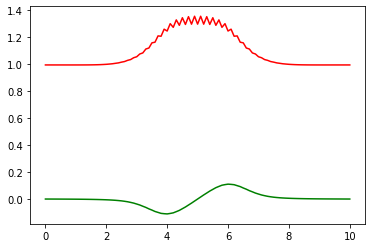

In [334]:
plt.plot([0.1*i for i in range(101)], r[1],"g",[0.1*i for i in range(101)], r[0],"r")


In [271]:
def determ_stabilisation():
    '''Возвращает момент стабилизации и потерянную массу'''
    eps = 1.629e-2
    step = 1800
    previous= -1
    res = run_prog(0)
    initial_mass = np.linalg.norm(res[0])
    while True:
        res = run_prog(step)
        if max(res[0]) - min(res[0]) < eps and max(res[1]) - min(res[1]) < eps:
            return step, np.linalg.norm(res[0]) - initial_mass
        step+=1
        print(step, max(res[0]) - min(res[0]), max(res[1]) - min(res[1]))


In [272]:
determ_stabilisation()

1801 0.024724999999999886 0.003202124
1802 0.024511999999999867 0.003871128
1803 0.02425300000000008 0.004536048
1804 0.023948999999999998 0.005181326
1805 0.023600999999999983 0.005803646
1806 0.023209000000000035 0.006400668
1807 0.022777000000000047 0.006970166
1808 0.02230500000000002 0.007510048
1809 0.021795999999999927 0.008018348
1810 0.02125100000000013 0.008493244
1811 0.02067399999999986 0.008935578
1812 0.020065999999999917 0.009347398
1813 0.019429999999999836 0.009720992
1814 0.018769000000000036 0.010055016
1815 0.01808399999999999 0.010348288
1816 0.017379000000000033 0.0105998
1817 0.016656999999999922 0.01080871


(1817, -0.6184162948289238)

In [283]:
r = run_prog(1817)

In [309]:
def draw(first, second):
    plt.figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')

    plt.plot([0.1*i for i in range(len(first))], first, "g")
    plt.plot([0.1*i for i in range(len(second))], second, "r")
    plt.legend(["Плотность", "Скорость"], prop={"size":20})
    plt.show()

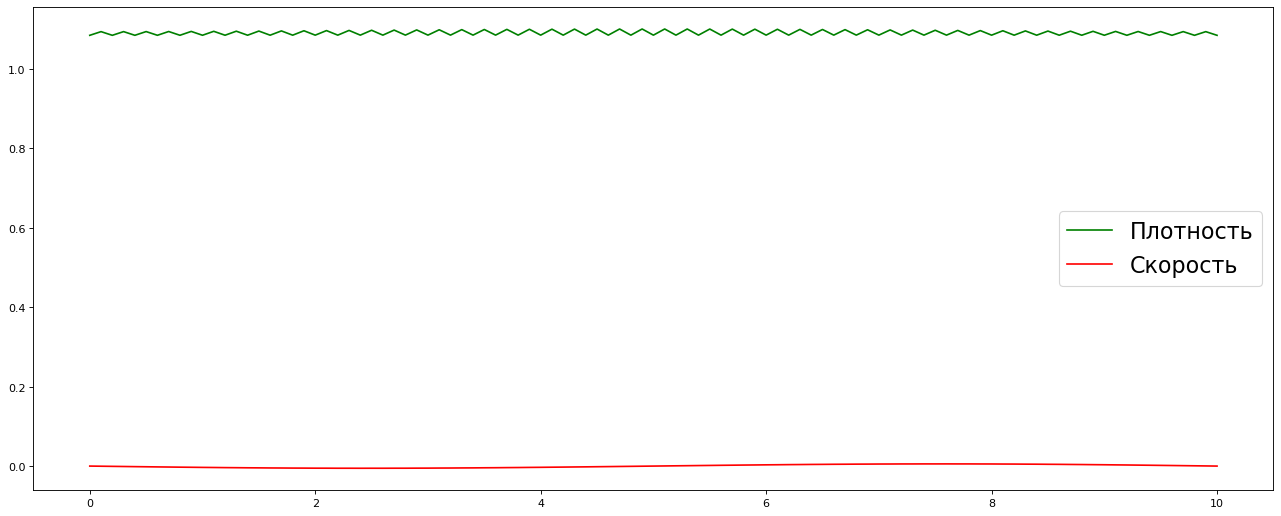

In [310]:
draw(r[0], r[1])